## Basic Data Merging and Summary Statistics

file we use  / dataset we use
1.  orders.csv
2.  customers.csv
3.  order_items.csv


In [251]:
#importing  all libraries thise we will use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime as dt
warnings.filterwarnings('ignore')

In [187]:
# load datasets
order_df = pd.read_csv('../Dataset/olist_orders_dataset.csv')
customers_df = pd.read_csv('../Dataset/olist_customers_dataset.csv')
order_items_df = pd.read_csv('../Dataset/olist_order_items_dataset.csv')

pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
print("\nOrder data dataframe")
print(order_df.head())
print("\nCustomers details dataframe")
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
print(customers_df.head())
print("\nOrder Items dataframe")
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
print(order_items_df.head())


Order data dataframe
                           order_id                       customer_id order_status order_purchase_timestamp    order_approved_at order_delivered_carrier_date order_delivered_customer_date order_estimated_delivery_date
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15          2017-10-04 19:55:00           2017-10-10 21:25:13           2017-10-18 00:00:00
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27          2018-07-26 14:31:00           2018-08-07 15:27:45           2018-08-13 00:00:00
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23          2018-08-08 13:50:00           2018-08-17 18:06:29           2018-09-04 00:00:00
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82    delivered      2017-11-18 19:28:0

In [188]:
# putting multiple dataframes in  single excel  for better analysis of relation
def multiple_dfs(df_list, sheets, file_name, spaces):
    writer = pd.ExcelWriter(file_name)
    row = 0
    for dataframe in df_list:
        dataframe.to_excel(writer,sheet_name=sheets,startrow=row , startcol=0)
        row = row + len(dataframe.index) + spaces + 1
    writer.close()

df= order_df.head()
df1= customers_df.head()
df2= order_items_df.head()
dfs = [df,df1,df2]

multiple_dfs(dfs, 'Validation', 'AnalysingFiinalMerge.xlsx', 1)

In [189]:

# mearging  all three dataframe to make a unified dataframe
first_mearge = pd.merge(order_df, customers_df, on='customer_id')
first_mearge.head()

final_mearge = pd.merge(first_mearge, order_items_df, on='order_id')
final_mearge.head()
export_to_excel = final_mearge.to_excel('output.xlsx', index=False)


In [190]:
final_mearge.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


In [191]:
#Keep only needed or usefull in  analysis

columns =[ "customer_id", "order_id", "order_status", "order_purchase_timestamp", "product_id", "price", "freight_value"]
df = final_mearge[columns]
df.head()

,customer_id,order_id,order_status,order_purchase_timestamp,product_id,price,freight_value
0,9ef432eb6251297304e76186b10a928d,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,87285b34884572647811a353c7ac498a,29.99,8.72
1,b0830fb4747a6c6d20dea0b8c802d7ef,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76
2,41ce2a54c0b03bf3443c3d931a367089,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,aa4383b373c6aca5d8797843e5594415,159.90,19.22
3,f88197465ea7920adcdbec7375364d82,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,27.20
4,8ab97904e6daea8866dbdbc4fb7aad2c,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39,65266b2da20d04dbe00c5c2d3bb7859e,19.90,8.72


## Checking Summery of dataframe using df.info()

In [192]:
##Summmary 
df.info()

## Here i see in this dataframe here have 112650 entries range from 0 - 112649
## Coulumns : customer_id , order_id , order_status , order_purchase_timestamp , product_id ,price , freight_value             
## Datatypes :dtypes: float64(2), object(5)
            

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   customer_id               112650 non-null  object 
 1   order_id                  112650 non-null  object 
 2   order_status              112650 non-null  object 
 3   order_purchase_timestamp  112650 non-null  object 
 4   product_id                112650 non-null  object 
 5   price                     112650 non-null  float64
 6   freight_value             112650 non-null  float64
dtypes: float64(2), object(5)
memory usage: 6.0+ MB


## Generating the descriptive statistics for all columns both numerical and categorical 
    for numerical data : Count,Mean,std,min,max, and percentiels like 25/50/75%
    for object data :count ,unique, top , freq

### Here using this df.describe(include="all") method we spot outliers or unusual features 
### Understands central destribution and central tendancy 
   

In [193]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customer_id,112650,98666,fc3d1daec319d62d49bfb5e1f83123e9,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_id,112650,98666,8272b63d03f5f79c56e9e4120aec44ef,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_status,112650,7,delivered,110197,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_purchase_timestamp,112650,98112,2017-07-16 18:19:25,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_id,112650,32951,aca2eb7d00ea1a7b8ebd4e68314663af,527,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,112650.0,NaN,NaN,NaN,120.653739,183.633928,0.85,39.9,74.99,134.9,6735.0
freight_value,112650.0,NaN,NaN,NaN,19.99032,15.806405,0.0,13.08,16.26,21.15,409.68


## Size of dataframe

In [194]:
df.shape

(112650, 7)

## Datatype of columns included in dataframe


In [195]:
df.dtypes

customer_id                  object
order_id                     object
order_status                 object
order_purchase_timestamp     object
product_id                   object
price                       float64
freight_value               float64
dtype: object

## Cleaning of data and handling null and dupplicate values if exists 

In [196]:
#Check null values 
# df.isna().sum()
#in this dataset  their have no null values 
print(df.count()) 
df.duplicated(subset='order_id').sum()

customer_id                 112650
order_id                    112650
order_status                112650
order_purchase_timestamp    112650
product_id                  112650
price                       112650
freight_value               112650
dtype: int64


np.int64(13984)

In [197]:
print(df.count())
df[df.duplicated(keep="first")]

# We have 2 duplicate records and this can be nigligible 


customer_id                 112650
order_id                    112650
order_status                112650
order_purchase_timestamp    112650
product_id                  112650
price                       112650
freight_value               112650
dtype: int64


,customer_id,order_id,order_status,order_purchase_timestamp,product_id,price,freight_value
11,494dded5b201313c64ed7f100595b95c,e6ce16cb79ec1d90b1da9085a6118aeb,delivered,2017-05-16 19:41:10,08574b074924071f4e201e151b152b4e,99.00,30.53
55,79183cd650e2bb0d475b0067d45946ac,9faeb9b2746b9d7526aef5acb08e2aa0,delivered,2018-07-26 14:39:59,f48eb5c2fde13ca63664f0bb05f55346,60.00,15.52
61,684fa6da5134b9e4dab731e00011712d,66e4624ae69e7dc89bd50222b59f581f,delivered,2018-03-09 14:50:15,b37b72d5a56f887725c2862184b8cab8,22.99,22.85
71,5dda11942d4f77bee3a46d71e442aec4,f271576bed568e896f99eb710cd3a6f8,delivered,2018-01-07 21:44:54,d457916b4fdc60154ed93b5dd3e6fd69,329.90,82.48
74,4afc1dcca5fe8926fc97d60a4497f8ab,68e48e68da1f50f7c5838ea75e3a20dd,delivered,2018-06-18 16:02:23,a659cb33082b851fb87a33af8f0fff29,84.90,13.25
...,...,...,...,...,...,...,...
112573,a14f464b2a19d761f7f3f0885d5ea955,dbd4cbb492a12b99c5224014930acc18,delivered,2017-03-26 14:12:46,d34efb58e1930773fcde9b951892b1b1,37.40,16.30
112595,472acc24324ad4cee482fe4ef5910dc1,83db27f85506380229913b0dfdf5cd18,delivered,2018-04-18 12:35:58,86f2416d4670e4ea3ca5494d043d9f24,149.94,49.15
112603,6f83c71b6c044fb156d697d4130fe9b5,b3112ca67f3afd4e20cf2ee91fc4f804,delivered,2018-08-02 22:46:54,4f18ca9862f511ecba98258b2194d061,95.00,24.75
112622,609b9fb8cad4fe0c7b376f77c8ab76ad,e8fd20068b9f7e6ec07068bb7537f781,delivered,2017-08-10 21:21:07,0df37da38a30a713453b03053d60d3f7,356.00,18.12


In [198]:
# but we will be drop those
df.drop_duplicates(inplace=True) #Only drop duplicates if all columns are exactly the same:

#this method was safe to handle / deleted duplicate records 
# because if their have same order id for purchasing diffrent product and  if we removes the row  based on 
# order_id  df.drop_duplicated[subset="order_id" , inplace true] then we will loose revenue data 
#check this
print(df.count())
df.groupby('order_id').size().sort_values(ascending=False).head()

customer_id                 102425
order_id                    102425
order_status                102425
order_purchase_timestamp    102425
product_id                  102425
price                       102425
freight_value               102425
dtype: int64


order_id
ca3625898fbd48669d50701aba51cd5f    8
7d8f5bfd5aff648220374a2df62e84d5    7
77df84f9195be22a4e9cb72ca9e8b4c2    7
ad850e69fce9a512ada84086651a2e7d    7
aa0b425987bdeae4a29c616a2bc3a08a    6
dtype: int64

In [199]:
df.duplicated()
#now here is no duplicated values in this dataset 

0         False
1         False
2         False
3         False
4         False
          ...  
112644    False
112645    False
112646    False
112647    False
112649    False
Length: 102425, dtype: bool

## Handeling Datatypes 

In [200]:
df.info()
# here we see the order_purchase_timestamp feture have object datatype we need to convert this to datetime 
df["order_purchase_timestamp"]= pd.to_datetime(df["order_purchase_timestamp"])

<class 'pandas.core.frame.DataFrame'>
Index: 102425 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   customer_id               102425 non-null  object 
 1   order_id                  102425 non-null  object 
 2   order_status              102425 non-null  object 
 3   order_purchase_timestamp  102425 non-null  object 
 4   product_id                102425 non-null  object 
 5   price                     102425 non-null  float64
 6   freight_value             102425 non-null  float64
dtypes: float64(2), object(5)
memory usage: 6.3+ MB


In [201]:
df.info()
#now order_purchase_timestamp   have  datetime64[ns]


<class 'pandas.core.frame.DataFrame'>
Index: 102425 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   customer_id               102425 non-null  object        
 1   order_id                  102425 non-null  object        
 2   order_status              102425 non-null  object        
 3   order_purchase_timestamp  102425 non-null  datetime64[ns]
 4   product_id                102425 non-null  object        
 5   price                     102425 non-null  float64       
 6   freight_value             102425 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 6.3+ MB


## Generate descriptive statistics-
    Mean, median, mode, min, max, range, IQR, standard deviation, variance.

In [202]:
# First we can find summery of numeric coulms 
df[['price', 'freight_value']].describe().T
# print(df[['price', 'freight_value']].mean().T ,"\n")
# print(df[['price', 'freight_value']].median().T ,"\n")
# print(df[['price', 'freight_value']].mode().T ,"\n")


,count,mean,std,min,25%,50%,75%,max
price,102425.0,124.422006,188.926084,0.85,40.00,78.80,139.00,6735.00
freight_value,102425.0,20.111152,15.884700,0.00,13.14,16.32,21.22,409.68


In [203]:
# Finds Range 
range_ = df[['price', 'freight_value']].max() - df[['price', 'freight_value']].min().T
range_

price            6734.15
freight_value     409.68
dtype: float64

 ## Standard Deviation & Variance

In [204]:
# Standard Deviation & Variance
print("Standerd Deviation \n")
print(df[['price','freight_value']].std(),"\n")

print("Varience \n" )
print(df[['price','freight_value']].var(),"\n")

Standerd Deviation 

price            188.926084
freight_value     15.884700
dtype: float64 

Varience 

price            35693.065273
freight_value      252.323679
dtype: float64 



## IQR (Interquartile Range)


In [205]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1    
IQR



np.float64(99.0)

## visualizations

### Histogram of product prices

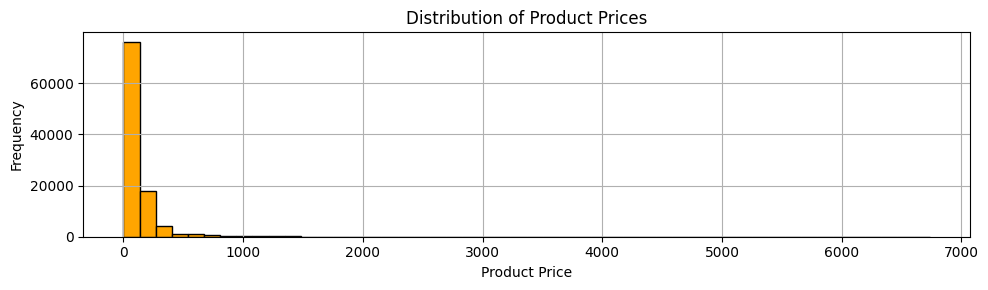

In [342]:
data = df["price"]
plt.figure(figsize=(10, 3)) 
plt.hist(data, bins=50, color='orange', edgecolor='black' ,orientation="vertical",rwidth=100)  # add bins and style
plt.title("Distribution of Product Prices")
plt.xlabel("Product Price")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()




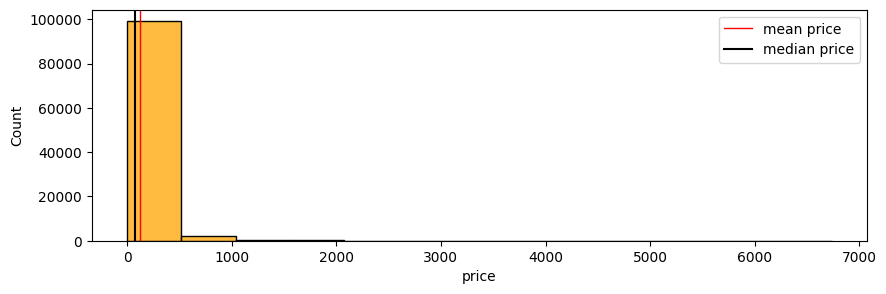

In [343]:
#Using Seaborn 
plt.figure(figsize=(10,3))
sns.histplot(data=df , x=data , bins=50,color="orange",binwidth=500)
mean_price = data.mean()
median_price =data.median()
plt.axvline(mean_price,color="red" , label="mean price" ,linewidth=1)
plt.axvline(median_price, color="black",label="median price")
plt.legend()


## Boxplot of freight value.




Text(0.5, 1.0, 'Fright Value')

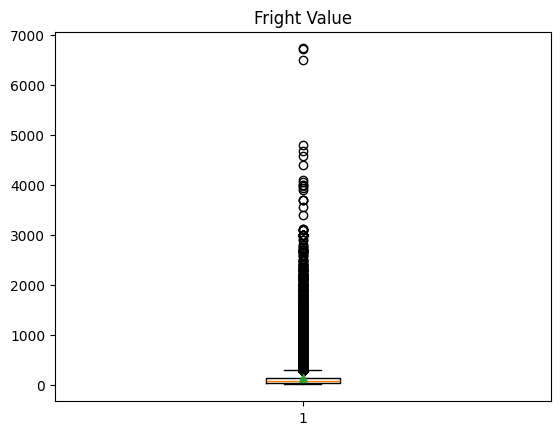

In [234]:
plt.boxplot(data , vert=True,showmeans=True)
plt.title("Fright Value")

## Count plot of order statuses

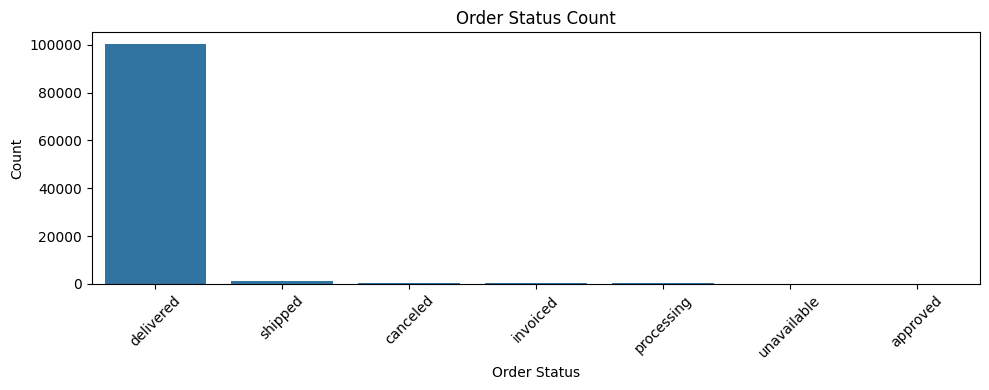

In [240]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 4))
sns.countplot(data=df, x="order_status", order=df["order_status"].value_counts().index)
plt.title("Order Status Count")
plt.xlabel("Order Status")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Distribution of number of items/order	


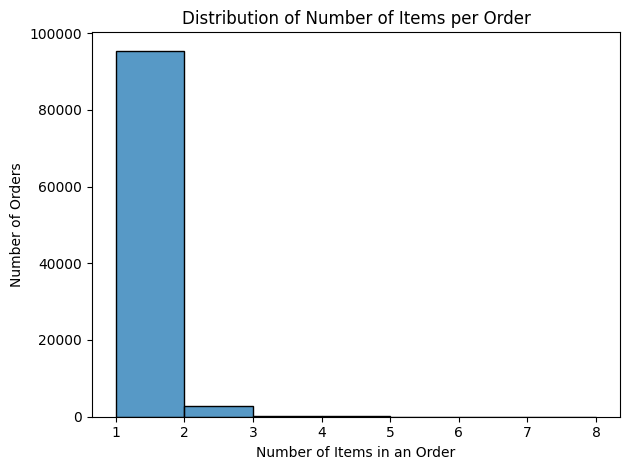

In [249]:
items_per_order = df.groupby("order_id")["product_id"].count()
items_per_order

sns.histplot(items_per_order, bins=range(1, items_per_order.max() + 1), kde=False)
plt.title("Distribution of Number of Items per Order")
plt.xlabel("Number of Items in an Order")
plt.ylabel("Number of Orders")
plt.xticks(range(1, items_per_order.max() + 1))
plt.tight_layout()
plt.show()


 ## Customer Segmentation & Payment Analysis
        Recency, Frequency, Monetary

In [282]:
#Calculate Recency
df_recency =df
df_recency =df.groupby(by="customer_id", as_index=False)["order_purchase_timestamp"].max()
df_recency .columns=['customer_id',"order_purchase_timestamp"]
recent_date =df_recency ["order_purchase_timestamp"].max() 
df_recency ["Recency"]=df_recency ['order_purchase_timestamp'].apply(lambda x:(recent_date-x).days)






In [ ]:
#Calculate Frequency
df_frequency=df
df_frequency=df.groupby(by='customer_id', as_index=False)["order_purchase_timestamp"].count()
df_frequency.columns=['customer_id','Frequency']
df_frequency




,customer_id,Frequency
0,00012a2ce6f8dcda20d059ce98491703,1
1,000161a058600d5901f007fab4c27140,1
2,0001fd6190edaaf884bcaf3d49edf079,1
3,0002414f95344307404f0ace7a26f1d5,1
4,000379cdec625522490c315e70c7a9fb,1
...,...,...
98661,fffcb937e9dd47a13f05ecb8290f4d3e,1
98662,fffecc9f79fd8c764f843e9951b11341,1
98663,fffeda5b6d849fbd39689bb92087f431,1
98664,ffff42319e9b2d713724ae527742af25,1


In [276]:
 # Calculate Monetary Value
 
df['Total'] = df['price']  # Total spent by each customer
df_monetary = df.groupby(by='customer_id', as_index=False)['Total'].sum()
df_monetary.columns = ['customer_id', 'Monetary']
df_monetary.head()

,customer_id,Monetary
0,00012a2ce6f8dcda20d059ce98491703,89.80
1,000161a058600d5901f007fab4c27140,54.90
2,0001fd6190edaaf884bcaf3d49edf079,179.99
3,0002414f95344307404f0ace7a26f1d5,149.90
4,000379cdec625522490c315e70c7a9fb,93.00


In [284]:
#MEarge all  dataframe 
df_rfm = pd.merge(df_recency,df_frequency,on="customer_id")


In [285]:
#second mearge
df_rfm=pd.merge(df_rfm,df_monetary ,on="customer_id")
df_rfm

,customer_id,order_purchase_timestamp,Recency,Frequency,Monetary
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,292,1,89.80
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,413,1,54.90
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,551,1,179.99
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,382,1,149.90
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,153,1,93.00
...,...,...,...,...,...
98661,fffcb937e9dd47a13f05ecb8290f4d3e,2018-03-17 00:55:27,170,1,78.00
98662,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,157,1,54.90
98663,fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:36:02,103,1,47.90
98664,ffff42319e9b2d713724ae527742af25,2018-06-13 16:57:05,81,1,199.90


In [286]:
df_rfm['R_rank'] = df_rfm['Recency'].rank(ascending=False)
df_rfm['F_rank'] = df_rfm['Frequency'].rank(ascending=True)
df_rfm['M_rank'] = df_rfm['Monetary'].rank(ascending=True)
df_rfm['R_rank_norm'] = (df_rfm['R_rank'] / df_rfm['R_rank'].max()) * 100
df_rfm['F_rank_norm'] = (df_rfm['F_rank'] / df_rfm['F_rank'].max()) * 100
df_rfm['M_rank_norm'] = (df_rfm['M_rank'] / df_rfm['M_rank'].max()) * 100

In [287]:
df_rfm

,customer_id,order_purchase_timestamp,Recency,Frequency,Monetary,R_rank,F_rank,M_rank,R_rank_norm,F_rank_norm,M_rank_norm
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,292,1,89.80,33955.0,47715.5,53074.0,34.414084,48.360631,53.791580
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,413,1,54.90,16650.0,47715.5,33529.5,16.875114,48.360631,33.982831
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,551,1,179.99,2812.5,47715.5,81902.5,2.850526,48.360631,83.009851
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,382,1,149.90,20927.0,47715.5,75766.5,21.209941,48.360631,76.790890
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,153,1,93.00,66363.5,47715.5,55535.0,67.260759,48.360631,56.285853
...,...,...,...,...,...,...,...,...,...,...,...
98661,fffcb937e9dd47a13f05ecb8290f4d3e,2018-03-17 00:55:27,170,1,78.00,62522.5,47715.5,47440.5,63.367827,48.360631,48.081913
98662,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,157,1,54.90,65583.0,47715.5,33529.5,66.469706,48.360631,33.982831
98663,fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:36:02,103,1,47.90,78582.5,47715.5,27373.0,79.644964,48.360631,27.743093
98664,ffff42319e9b2d713724ae527742af25,2018-06-13 16:57:05,81,1,199.90,82433.5,47715.5,84811.5,83.548031,48.360631,85.958182


In [317]:
df_rfm_new =df_rfm[["customer_id","Recency","Frequency","Monetary"]]
df_rfm_new

,customer_id,Recency,Frequency,Monetary
0,00012a2ce6f8dcda20d059ce98491703,292,1,89.80
1,000161a058600d5901f007fab4c27140,413,1,54.90
2,0001fd6190edaaf884bcaf3d49edf079,551,1,179.99
3,0002414f95344307404f0ace7a26f1d5,382,1,149.90
4,000379cdec625522490c315e70c7a9fb,153,1,93.00
...,...,...,...,...
98661,fffcb937e9dd47a13f05ecb8290f4d3e,170,1,78.00
98662,fffecc9f79fd8c764f843e9951b11341,157,1,54.90
98663,fffeda5b6d849fbd39689bb92087f431,103,1,47.90
98664,ffff42319e9b2d713724ae527742af25,81,1,199.90


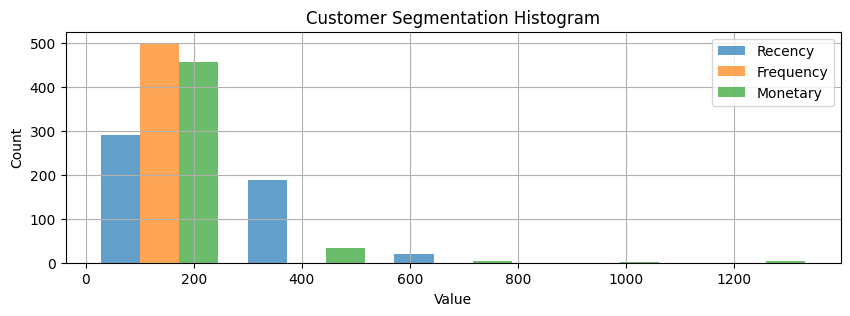

In [341]:
plt.figure(figsize=(10, 3))

plt.hist(
    [df_rfm_new["Recency"].head(500),
     df_rfm_new["Frequency"].head(500),
     df_rfm_new["Monetary"].head(500)],
    bins=5,
    label=["Recency", "Frequency", "Monetary"],
    alpha=0.7
)

plt.title("Customer Segmentation Histogram")
plt.xlabel("Value")
plt.ylabel("Count")
plt.legend()
plt.grid(True)
plt.show()


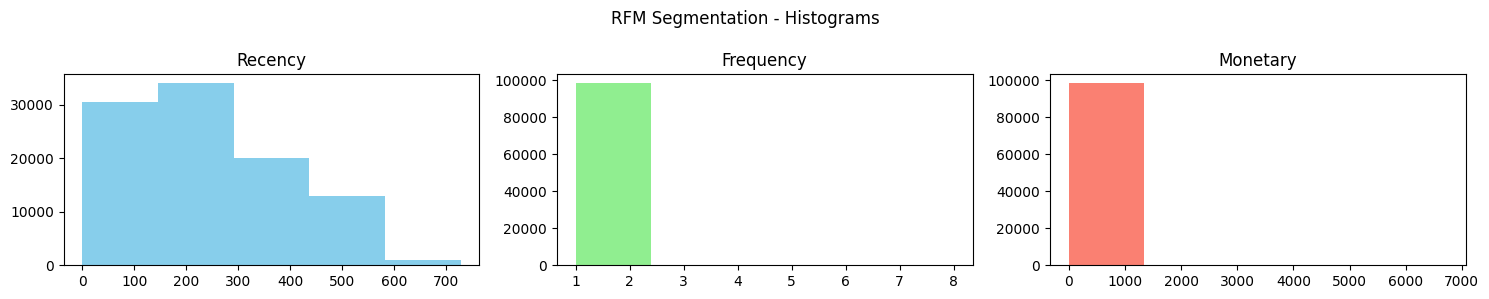

In [346]:
fig , axs = plt.subplots(1,3,figsize=(15,3))

axs[0].hist(df_rfm_new["Recency"], bins=5, color='skyblue')
axs[0].set_title("Recency")

axs[1].hist(df_rfm_new["Frequency"],bins=5,color="lightgreen")
axs[1].set_title("Frequency")

axs[2].hist(df_rfm_new["Monetary"],bins=5,color="salmon")
axs[2].set_title("Monetary")

plt.suptitle("RFM Segmentation - Histograms")
plt.tight_layout()

plt.show()

## Payment Method Distribution


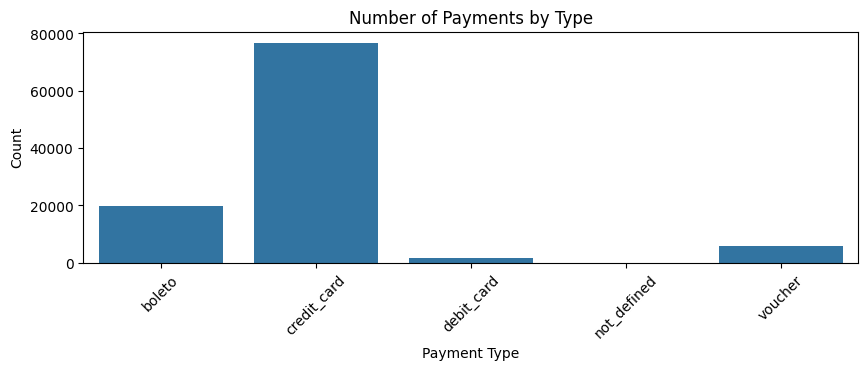

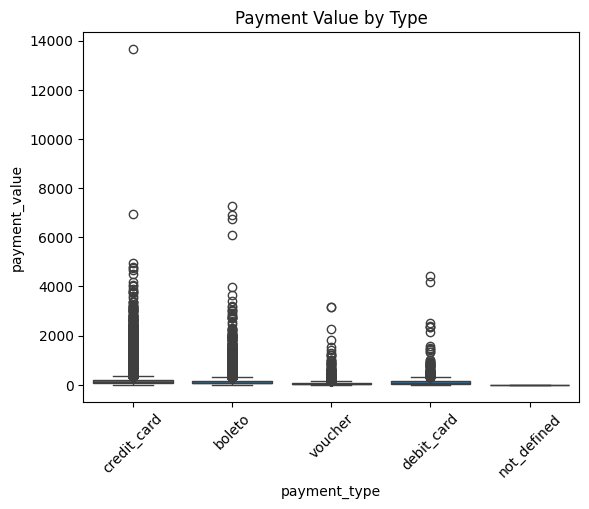

In [350]:
plt.figure(figsize=(10,3))
payments =pd.read_csv('../Dataset/olist_order_payments_dataset.csv')
payment_stats = payments.groupby('payment_type').agg({
    'payment_value': ['count', 'mean', 'sum']
}).reset_index()

payment_stats.columns = ['Payment Type', 'Count', 'Average Payment', 'Total Payment']


sns.barplot(data=payment_stats, x='Payment Type', y='Count')
plt.title('Number of Payments by Type')
plt.xticks(rotation=45)
plt.show()

sns.boxplot(data=payments, x='payment_type', y='payment_value')
plt.title('Payment Value by Type')
plt.xticks(rotation=45)
plt.show()
